# Fashion classification

In [151]:
# connecting to https://github.com/alexeygrigorev/clothing-dataset-small and access to the train folder
# and download the images to the local machine
import numpy as np
import matplotlib.pyplot as plt
import os
import requests 
import re
import urllib.request
import urllib.parse
import matplotlib.pyplot as plt


In [152]:
from PIL import Image # python image library

In [153]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.1 Tensorflow and Keras

In [154]:
import tensorflow as tf
from tensorflow import keras

In [155]:
# load the images
from tensorflow.keras.preprocessing.image import load_img

In [156]:
path = './clothing-dataset-small/train/t-shirt'
name = '0aa095c3-9d4d-4416-8788-82655af859a8.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

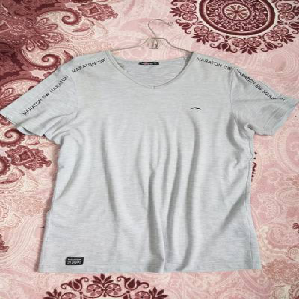

In [157]:
img

In [158]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 pre-trained convulotional neural networks

models created in keras.io

Xception is fast and accurate https://keras.io/api/applications/xception/

In [159]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions # decode the predictions

In [160]:
model = Xception(weights='imagenet' , input_shape=(299, 299, 3))


In [161]:
X = np.array([x])

In [162]:
X = preprocess_input(X)

In [163]:
pred = model.predict(X)

1/1 [==============================] - 0s 396ms/step


In [164]:
pred # the output is the probability of each class

array([[1.33592141e-04, 2.00074079e-04, 1.39770695e-04, 9.42985353e-05,
        2.27636905e-04, 1.43124431e-04, 2.44549563e-04, 7.23329867e-05,
        1.01383615e-04, 1.26775456e-04, 2.49043020e-04, 1.72880245e-04,
        8.37159096e-05, 1.23231861e-04, 1.18427321e-04, 1.54962050e-04,
        3.02411849e-04, 1.51962638e-04, 1.54894093e-04, 2.01821051e-04,
        5.71106619e-04, 1.47877392e-04, 2.91030155e-04, 1.79659546e-04,
        3.08735413e-04, 9.56367439e-05, 1.52511435e-04, 2.15294363e-04,
        2.47479213e-04, 1.44418067e-04, 1.95722139e-04, 1.58356634e-04,
        2.58639571e-04, 4.27470572e-04, 4.72175539e-04, 3.12571356e-04,
        1.77972499e-04, 1.48943291e-04, 3.57474637e-04, 2.77843064e-04,
        1.21177720e-04, 3.80713609e-04, 6.20144478e-04, 6.18168095e-04,
        5.71138458e-04, 2.21950235e-04, 2.20482340e-04, 2.18415051e-04,
        3.25314584e-04, 3.98042466e-04, 3.97087773e-04, 1.71015301e-04,
        8.43556481e-04, 1.15425372e-03, 6.86483865e-04, 4.625589

In [165]:
decode_predictions(pred) # the output is the class name and the probability

[[('n03595614', 'jersey', 0.66094387),
  ('n03877472', 'pajama', 0.033283),
  ('n03710637', 'maillot', 0.027335895),
  ('n04525038', 'velvet', 0.02497967),
  ('n04370456', 'sweatshirt', 0.01425744)]]

as this model is very general and does not have tshirt, is not fittig our purpose

but we can built on top, not neccesary starting from scratch

## 8.5 Transfer learning

In [166]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [167]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [168]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [169]:
X, y = next(train_ds)

In [170]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [171]:
y[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

the 1 in the last indice meand is a tshirt

In [172]:
X[5]

array([[[ 0.85882354, -0.7411765 , -0.8117647 ],
        [ 0.8666667 , -0.73333335, -0.8039216 ],
        [ 0.85882354, -0.7411765 , -0.8117647 ],
        ...,
        [ 0.3803922 , -0.8352941 , -0.7882353 ],
        [ 0.33333337, -0.8509804 , -0.8117647 ],
        [ 0.26274514, -0.90588236, -0.8745098 ]],

       [[ 0.85882354, -0.7411765 , -0.8117647 ],
        [ 0.8745098 , -0.7254902 , -0.79607844],
        [ 0.85882354, -0.7411765 , -0.8117647 ],
        ...,
        [ 0.20000005, -0.9372549 , -0.8980392 ],
        [ 0.1686275 , -0.92941177, -0.90588236],
        [ 0.15294123, -0.9372549 , -0.9137255 ]],

       [[ 0.8745098 , -0.7254902 , -0.79607844],
        [ 0.85882354, -0.7411765 , -0.8117647 ],
        [ 0.8745098 , -0.7254902 , -0.79607844],
        ...,
        [ 0.09803927, -0.96862745, -0.9372549 ],
        [ 0.09803927, -0.9607843 , -0.92941177],
        [ 0.09019613, -0.96862745, -0.9372549 ]],

       ...,

       [[ 0.24705887, -0.8980392 , -0.8980392 ],
        [ 0

In [173]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


using xception to get the conv layer
we say include_top flase means that we dont need to include the dense layers

In [174]:
base_model = Xception(weights='imagenet', 
                      include_top=False,
                      input_shape=(150, 150, 3)
                      ) # include_top=False means that we are not including the last layer

base_model.trainable = False # we are not training the model

create a new top layer

In [175]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [176]:
preds = model.predict(X)


1/1 [==============================] - 1s 957ms/step


In [177]:
preds.shape

(32, 5, 5, 2048)

4 dimensional output  
now we need to convert this 3D to 1D (vector)
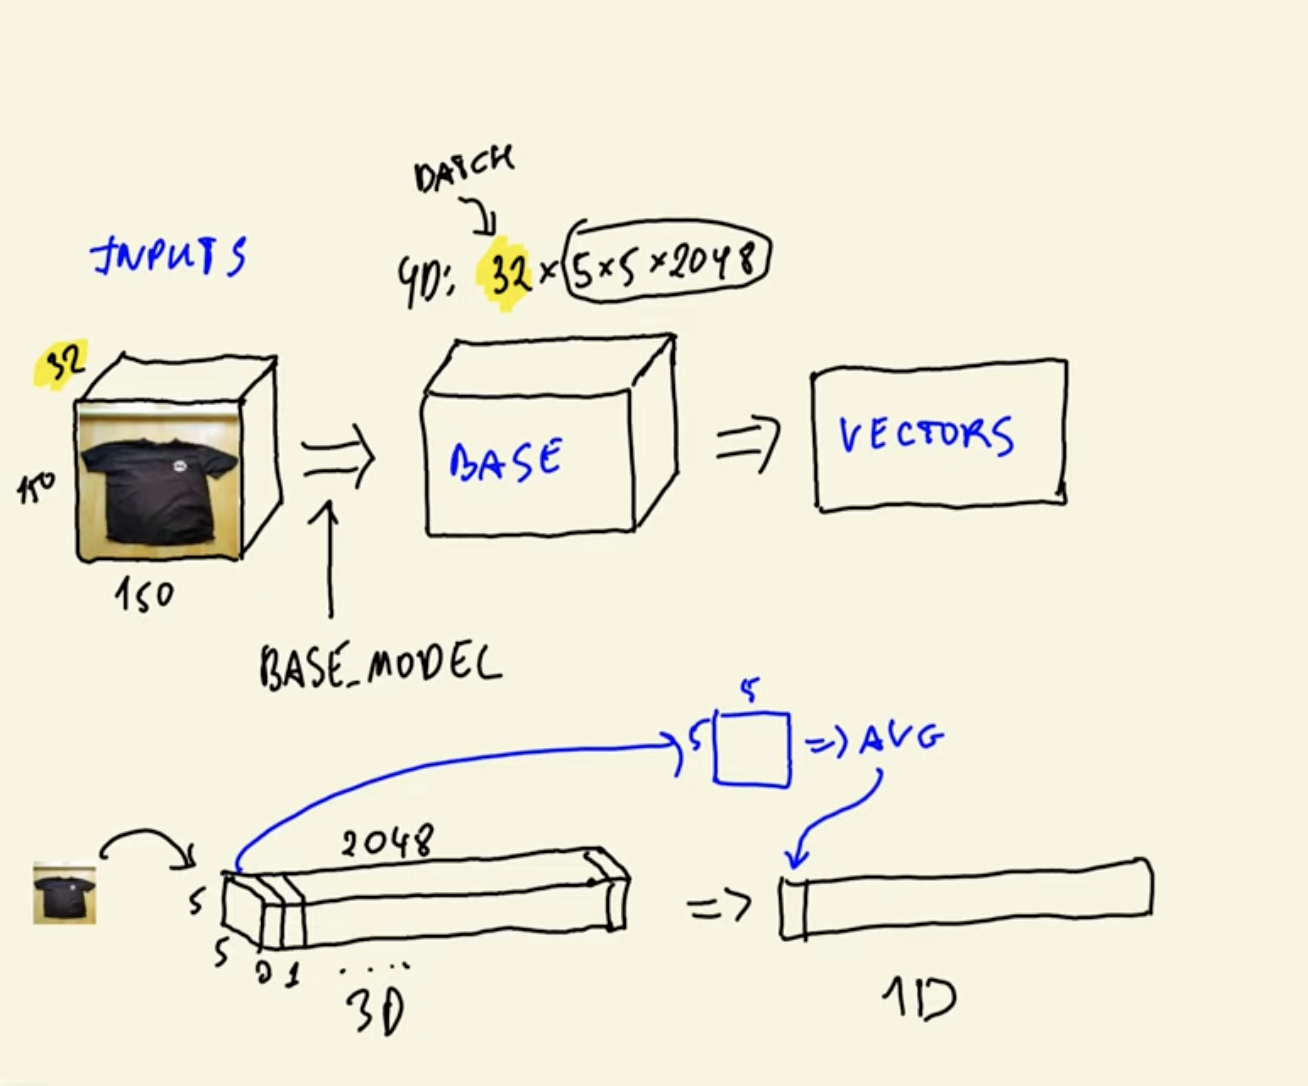

inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs)

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [178]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs=inputs, outputs=outputs)

In [179]:
preds = model.predict(X)

preds.shape

1/1 [==============================] - 1s 992ms/step


(32, 2048)

In [180]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10, activation='softmax')(vectors)

model = keras.Model(inputs=inputs, outputs=outputs)

In [181]:
preds = model.predict(X)

preds.shape

1/1 [==============================] - 1s 1s/step


(32, 10)

In [182]:
preds[0]

array([0.14156957, 0.03976947, 0.08430925, 0.14958528, 0.29149875,
       0.08316077, 0.0438673 , 0.08570138, 0.05894972, 0.02158847],
      dtype=float32)

we havent trained yet the model

we train the model by using the optimizer, there are multiple but we will use Adam.
optimizer is using gradient descent and what it does is changing the w1,w2.... 

Adam has multiple parameters but learning rate is the most important one. 


In [183]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # meansquarederror when is regression
# from_logits=True means that the output is not normalized. If we have false, we need to use softmax activation function inside the model like outputs = keras.layers.Dense(10, activation='softmax')(vectors)


In [184]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(train_ds, epochs=10, validation_data=val_ds) # epochs is the number of times that the model will see the data, we have 32 batches, so we have 32*10 = 320 images. Go over the data 10 times



Epoch 1/10
96/96 [==============================] - 60s 616ms/step - loss: 1.2083 - accuracy: 0.6692 - val_loss: 0.9101 - val_accuracy: 0.7654
Epoch 2/10
85/96 [=========================>....] - ETA: 9s - loss: 0.5372 - accuracy: 0.8284 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])